# LAB0 - Podstawy

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


# Wprowadzenie

Celem zajęć jest zaznajomienie się z podstawowymi technikami sotosowanymi w uczeniu maszynowym. W trakcie zajęć laboratoryjnych zostanie wykorzystany zbiór danych Irys, a następnie dla wybranych algorytmów uczenia maszynowego zostanie zidentyfikowany jeden, który cechuje się najwyższą jakością klasyfikacji.

Środowisko pracy: Anaconda, Jupyter Notebook

Narzędzia: Scikit Learn, Python

## Zbiór _Iris_

Zbiór danych *iris*  zawiera 150 instancji opisujących kwiaty Irysa. Kwiaty są określone przy pomocy 4 atrybutów numerycznych opisujących długości i szerokości płatków kwiatu *sepal* i *petal*. Ostatni atrybut jakościowy definiuje gatunek opisywanego Irysa (species). Jednym z problemów możliwych do rozwiązania przy użyciu tego zbioru uczącego jest określenie gatunku dla nowego kwiatu Irysa w zależności od wielkości jego płatków. Jest to przykład zadania klasyfikacji.

Zbiór uczący *iris* jest zbiorem etykietowanym ponieważ klasa, czyli konkretny gatunek irysa jest znany dla każdej instancji (obiektu) w zbiorze uczącym:

https://archive.ics.uci.edu/ml/datasets/iris

```
Source:

Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```
![](iris.png)

# Konfiguracja wstępna

In [1]:
# Konfiguracja interakcji z wykresami pakietu matplotlib

# Standardowe rozwiązanie
%matplotlib inline

# Interaktywne wykresy - może powodować błędy
#%matplotlib notebook

In [2]:
# Załaduj biblioteki
from pandas import read_csv
from matplotlib import pyplot 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import numpy as np




# Operacje na danych tablicowych - przykłady dla _NumPy_

In [3]:
# NumPy - tworzenie tablic

a = np.array([1,2,3])
b = np.array([(1.5,2,3), (4,5,6)], dtype = float)
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]], dtype = float)

print(a)
print(b)
print(c)

[1 2 3]
[[1.5 2.  3. ]
 [4.  5.  6. ]]
[[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]


In [4]:
# NumPy - przeglądanie tablic

print(a.shape)
print(len(a))
print(b.ndim)
print(c.size)
print(b.dtype)
print(b.dtype.name)
print(b.astype(int))

(3,)
3
2
12
float64
float64
[[1 2 3]
 [4 5 6]]


In [5]:
# NumPy - subsetting

print(a[2]) #wybierz element z indeksem równym 2
print(b[1,2]) # wybierz element z pierwszego wiersza i drugiej kolumny

# NumPy - slicing
print(a[0:2])   #wybierz elementy o indeksach 0 i 1
print(b[0:2,1]) #wybierz elementy z wiersza 0 i 1 oraz kolumny 1

print(b[:1])    #wybierz elementy z wiersza 0 
print(b[0:1,:]) #wybierz elementy z wiersza 0

3
6.0
[1 2]
[2. 5.]
[[1.5 2.  3. ]]
[[1.5 2.  3. ]]


# Wczytywanie danych - biblioteka _Pandas_

Przeanalizuj w edytorze teksotwym format i zawartośc pliku wejściowego ze zbiorem - plik _iris.csv_.

_UWAGA! W przypadku błędów z odczytem danych popraw pliki zawierające dane wejściowe._

In [6]:
filename = 'iris.csv'
dataset = read_csv(filename)

Wypisz rozmiar danych wejściowych.

In [7]:
print(dataset.size)

750


Sprawdź poprawność odczytania danych poprzez wypisanie pierwszych 20 wierszy.

In [8]:
dataset[:20]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Analiza statystyczna

Sprawdź jaki jest przedział wartości, czy nie ma elementów znacznie odbiegających od wartości oczekiwanej. Mogłoby to sugerować błędy w danych wejściowych.

In [9]:
# descriptions
print(dataset.describe)

<bound method NDFrame.describe of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>


Sprawdź czy licznośc klas wynikowych jest zbliżona. Występowanie znacznych dysproporcji może skutkować błędnym wyuczeniem modelu.

In [10]:
# class distribution
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


# Wizualizacja danych

Narysuj wykresy przedstawiające dane wejściowe.

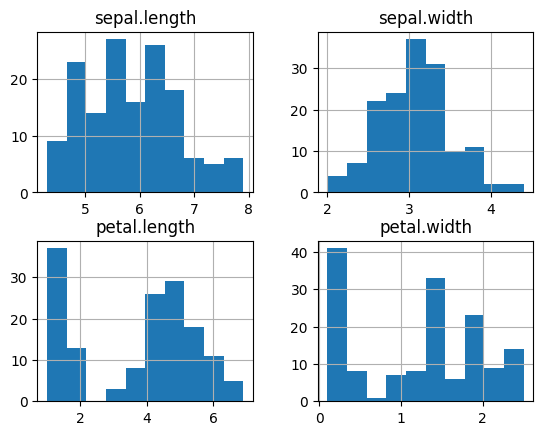

In [11]:
dataset.hist()
pyplot.show()

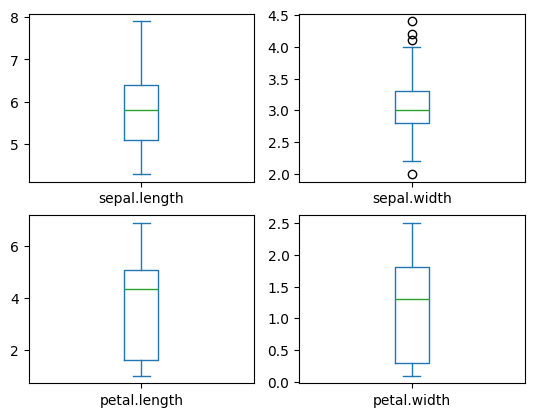

In [12]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

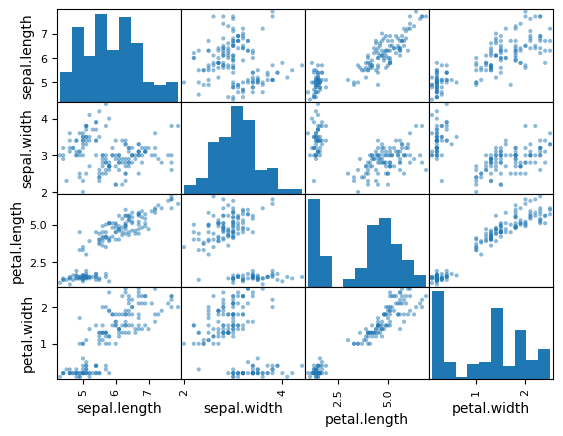

In [13]:
scatter_matrix(dataset)
pyplot.show()

# Ewaluacja wybranego algorytmu ML

Na potrzeby klasyfikacji irysów zdecydowano się wykorzystać model ML bazujący ba regresji logistycznej. W procesie uczenia wykrozystamy dwa zbiory danych - treningowy oraz testowy z podziałem 20%/80%.

Stwórz dwie tablice:
 - X składającą się z 4 kolumn - cechy wejściowe
 - Y składającą się z 1 kolumny - etykiety klasy dla zbioru uczącego

In [14]:
array = dataset.values
X = dataset.values[:, :-1]
Y = dataset.values[:, -1]

Wypisz tablice aby sprawdzić ich poprawność.

In [15]:
print(X.shape)
print(X)

print(Y.shape)
print(Y)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

Stwórz zbiór uczący i testowy z podziałem 80%/20%.

In [16]:
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= validation_size, random_state=seed)

Naucz model, a następnie sprawdź jego skuteczność.

In [17]:
klr = LogisticRegression(max_iter=2000)
klr.fit(X_train, Y_train)
predictions = klr.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.83      0.83      0.83        12
   Virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Wybór najlepszego algorytmu ML dla zadanego problemu

Sprawdź skuteczność innych modeli ML w problemie klasyfikacji Irysów. Jako miarę jakości klasyfikacji wybierz _accuracy_score_. Wyniki skuteczności ich działania przedstaw na wykresie.

Przeanalizuj metody:
- LogisticRegression()
- KNeighborsClassifier()
- DecisionTreeClassifier()
- SVC()
- GaussianNB()

Lista dostępnych algorytmów w bibliotece _scikit-learn_:
https://scikit-learn.org/stable/modules/multiclass.html#multiclass

Dla wybranej metody wylicz wskaźniki jakościowe dotyczące predykcji.

In [18]:
def run_models(X_train, X_test, Y_train, Y_test):
    models = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'K Neighbors Classifier': KNeighborsClassifier(n_neighbors=3),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Support Vector Classifier': SVC(max_iter=2000),
        'Gaussian Naive Bayes': GaussianNB()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        results[name] = accuracy
    
    return results


results = run_models(X_train, X_test, Y_train, Y_test)
print(results)

{'Logistic Regression': 0.8666666666666667, 'K Neighbors Classifier': 0.9, 'Decision Tree': 0.9, 'Support Vector Classifier': 0.8666666666666667, 'Gaussian Naive Bayes': 0.8333333333333334}


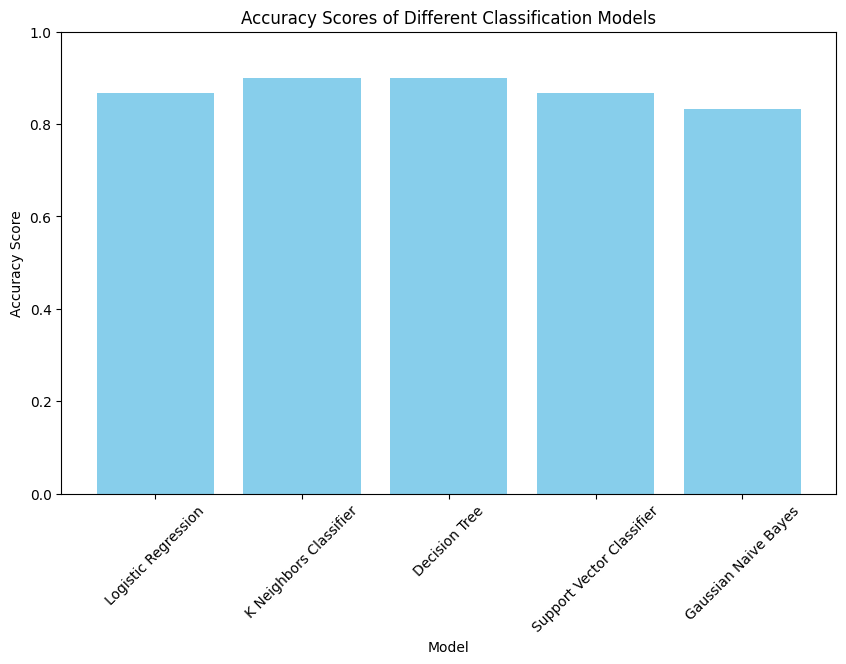

In [19]:
names = list(results.keys())
accuracies = list(results.values())

pyplot.figure(figsize=(10, 6))
pyplot.bar(names, accuracies, color='skyblue')
pyplot.xlabel('Model')
pyplot.ylabel('Accuracy Score')
pyplot.title('Accuracy Scores of Different Classification Models')
pyplot.ylim(0, 1)  # Ustawienie zakresu osi Y od 0 do 1 dla dokładności
pyplot.xticks(rotation=45)  # Obrócenie nazw modeli o 45 stopni dla lepszej czytelności
pyplot.show()

Policz skuteczność najlepszego modelu.

In [20]:
max_accuracy = max(results.values())

best_models = [name for name, accuracy in results.items() if accuracy == max_accuracy]

print(f'Najlepsze modele: {best_models}')
print(f'Skuteczność: {max_accuracy}')


Najlepsze modele: ['K Neighbors Classifier', 'Decision Tree']
Skuteczność: 0.9


# Podsumowanie

**TODO** jaki problem ML występował w zadaniu?

Problem polegał na klasyfikacji irysów na podstawie wielkości ich kwiatów.

**TODO** jak się rozkłada liczność klas wynikowych

Setosa:7 Versicolor:12 Virginica:11

**TODO** jakie algorytmu ML były rozważane?

Rozważane były:
LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
GaussianNB()

**TODO** który z algorytmów cechował się najwyższą skutecznością?

Najwyższą skuteczność uzyskały dwa algorytmy: KNN, DecisionTree

